# Artificial Neural Network (ANN) Implementation

This notebook demonstrates a complete implementation of an Artificial Neural Network for binary classification.

## Dataset
We'll use the Churn Modeling dataset to predict customer churn.

## Topics Covered:
1. Data Preprocessing
2. Feature Scaling
3. Building ANN Architecture
4. Training the Model
5. Evaluating Performance
6. Making Predictions

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

2025-10-21 08:40:43.987750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-21 08:40:43.988064: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-21 08:40:44.031886: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-21 08:40:46.080286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

TensorFlow Version: 2.20.0
Keras Version: 3.11.3


## 2. Load and Explore Data

In [2]:
# For demonstration, we'll create a synthetic dataset
# You can replace this with your own dataset

from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)

# Create DataFrame
feature_names = [f'Feature_{i+1}' for i in range(20)]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['Target'].value_counts())

Dataset Shape: (10000, 21)

First few rows:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.006691   0.405354   0.459728  -4.363860  -1.381650  -2.380556   
1   3.203618  -0.707863  -0.159855   0.205699  -1.919808   0.756397   
2   0.080839  -1.297337   5.958390 -12.574464  -0.226542  -2.381623   
3   0.446512   0.652471  -3.803628  -4.147973   1.320190   0.845094   
4  -0.301284  -0.521775  -0.603533  -0.276637   0.923722   0.789961   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0  -1.248945   0.517074  -0.061122    0.774127  ...    1.659910   -0.715758   
1  -1.333290  -0.279193  -3.010265    0.709751  ...    1.638691    3.772126   
2  -3.105482  -5.083754  -1.982817    4.415567  ...   -1.594456    1.421270   
3   0.843244  -4.073604   2.357456    2.516031  ...   -1.052972    0.277697   
4   0.163219  -2.097361   0.534197   -1.663811  ...   -1.148814    1.161538   

   Feature_14  Feature_15  Feature_16  Feature_17  Fea

## 3. Data Visualization

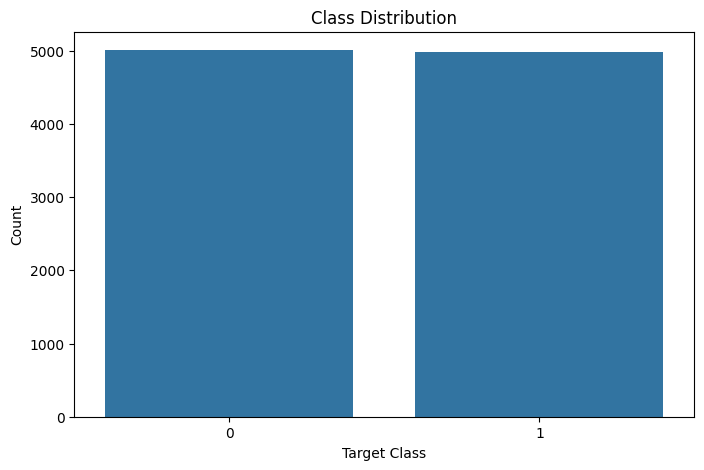

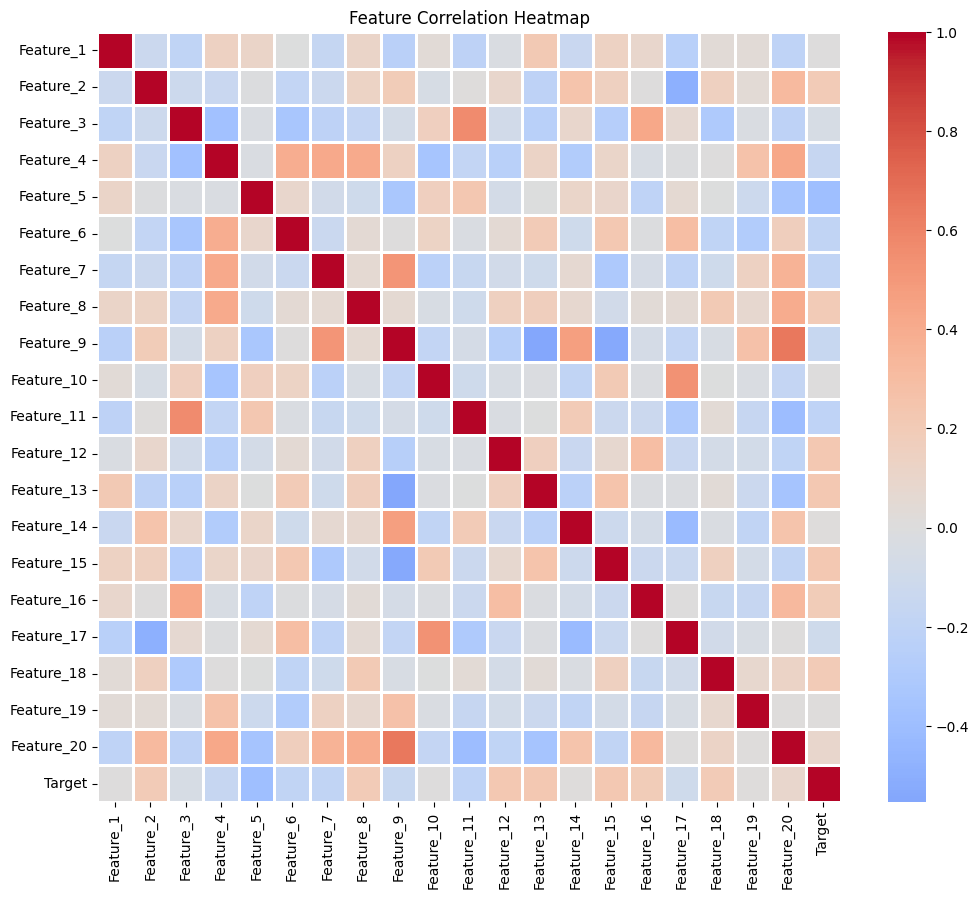

In [3]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=df)
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0, linewidths=1, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

## 4. Data Preprocessing

In [4]:
# Split features and target
X = df.drop('Target', axis=1).values
y = df['Target'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 8000
Testing set size: 2000


## 5. Feature Scaling

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature Scaling Complete")
print(f"Mean of first feature in training: {X_train[:, 0].mean():.4f}")
print(f"Std of first feature in training: {X_train[:, 0].std():.4f}")

Feature Scaling Complete
Mean of first feature in training: 0.0000
Std of first feature in training: 1.0000


## 6. Build ANN Architecture

In [6]:
# Initialize the ANN
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Display model architecture
model.summary()

/home/pravinkumars/miniconda3/envs/fita/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-21 08:47:05.843200: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Compile the Model

In [7]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

print("Model Compiled Successfully")

Model Compiled Successfully


## 8. Train the Model

In [8]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=100, 
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

print("\nTraining Complete!")

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7811 - loss: 0.4565 - val_accuracy: 0.8938 - val_loss: 0.2573
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2561 - val_accuracy: 0.9450 - val_loss: 0.1556
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.1739 - val_accuracy: 0.9625 - val_loss: 0.1030
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9480 - loss: 0.1448 - val_accuracy: 0.9650 - val_loss: 0.0959
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1315 - val_accuracy: 0.9712 - val_loss: 0.0811
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9567 - loss: 0.1232 - val_accuracy: 0.9706 - val_loss: 0.0800
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9625 - loss: 0.1149 - val_accuracy: 0.9744 - val_loss: 0.0729
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9666 - loss: 0.1116 - val_accu

## 9. Visualize Training History

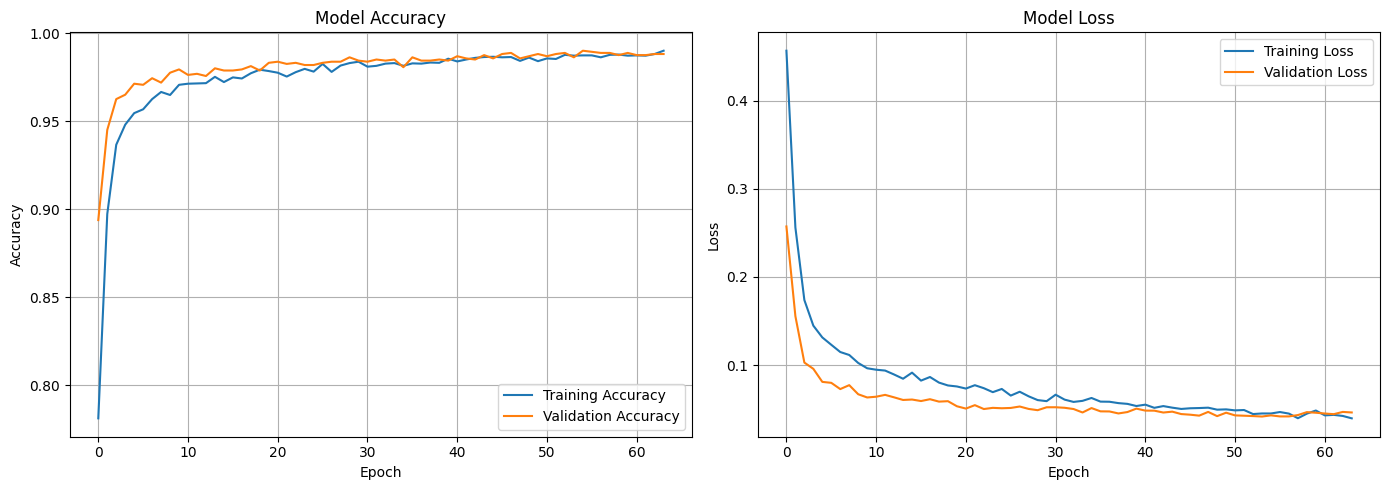

In [9]:
# Plot training & validation accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 10. Evaluate the Model

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Test Accuracy: 0.9870


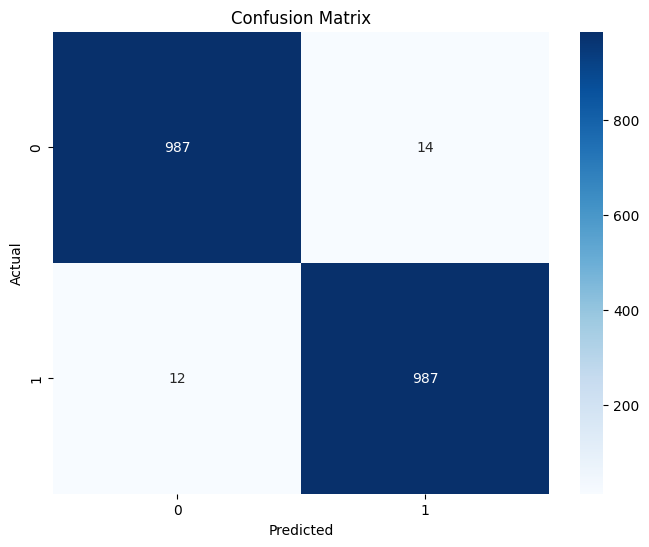


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1001
           1       0.99      0.99      0.99       999

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [10]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## 11. Make Predictions on New Data

In [11]:
# Example: Predict for a single sample
sample = X_test[0].reshape(1, -1)
prediction_prob = model.predict(sample)
prediction_class = (prediction_prob > 0.5).astype(int)[0][0]

print(f"Prediction Probability: {prediction_prob[0][0]:.4f}")
print(f"Predicted Class: {prediction_class}")
print(f"Actual Class: {y_test[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction Probability: 0.0006
Predicted Class: 0
Actual Class: 0


## 12. Save the Model

In [12]:
# Save the model
model.save('ann_model.h5')
print("Model saved as 'ann_model.h5'")

# To load the model later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('ann_model.h5')

Model saved as 'ann_model.h5'


## Summary

### Key Takeaways:
1. **ANN Architecture**: Multi-layer perceptron with dense layers
2. **Activation Functions**: ReLU for hidden layers, Sigmoid for output
3. **Regularization**: Dropout layers to prevent overfitting
4. **Optimization**: Adam optimizer with binary crossentropy loss
5. **Early Stopping**: Prevents overfitting by monitoring validation loss

### When to Use ANN:
- Binary or multi-class classification
- Regression problems
- Pattern recognition in structured/tabular data
- When you have sufficient training data

### Advantages:
- Can learn complex non-linear relationships
- Flexible architecture
- Good performance on various tasks

### Limitations:
- Requires significant training data
- Computationally expensive
- Can overfit without proper regularization
- Acts as a "black box" (less interpretable)